# Political Tweets Analysis
## Sprint 2

## Introduction

Can we predict if a political tweet has a Democrat or Republican inclination?

Welcome to this Jupyter Notebook dedicated to the analysis of political tweets! In this project, we delve into the fascinating world of political discourse on social media. Our goal is to gain insights into the dynamics of political discussions by analyzing a dataset of tweets.

### Data Overview

The dataset is comprised of political tweets, encompassing a variety of topics and sentiments. Throughout this analysis, we perform Exploratory Data Analysis (EDA) and engage in Feature Engineering to extract valuable information. Notably, a "retweets" column is introduced to binary code tweets that are retweets, and hashtags are systematically extracted and categorized into Democrat and Republican lists. These hashtags are consolidated in a "Hashtags" column, providing a quick reference for each tweet's associated hashtags. Additionally, the "Party" column is binarized to facilitate classification tasks.

### Visualizations

To better understand the landscape of political tweets, we present visualizations such as the top hashtags associated with each party and word clouds highlighting the most prevalent hashtags. These visualizations serve as powerful tools for grasping the key themes within the dataset.

### Data Cleaning

To ensure the quality of our analysis, a comprehensive data cleaning process is implemented. This involves tokenizing tweets to lowercase, removing hashtags, links, punctuations, and handles. This step is crucial for preparing the data for sentiment analysis, a task to be performed for Sprint 3.

### Modeling

A significant aspect of our project will involve sentiment analysis. The cleaned dataset is split into training and testing sets, and a logistic regression model is employed. Notably, the model's top 20 coefficients for both words and hashtags are plotted, shedding light on the features contributing most to the classification of tweets as either Democrat or Republican.

## Adressing Data Quality Issues

It's essential to acknowledge data quality issues, including truncated tweets and a notable percentage of retweets (20%). To mitigate these challenges, a plan is in place for Sprint 3, which involves scraping a dedicated dataset to supplement and enhance the current dataset, ensuring a more comprehensive and representative analysis.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load DataFrame into variable df
df = pd.read_csv('ExtractedTweets.csv')
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [3]:
#Check for null values in the dataset
df.isna().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [4]:
# Check the amount of tweets
df.shape[0]

86460

## 1.  EDA

### Checking for Nulls and Duplicates

In [5]:
# Check of unique values
for col in df.columns:
    selected =  df[col]
    n_unique = selected.unique().shape[0]
    print("The column {} has {} unique values".format(col,n_unique))

The column Party has 2 unique values
The column Handle has 433 unique values
The column Tweet has 84502 unique values


We can see there are more tweets 86,460 than unique tweets 84,502. These duplicate values might be retweets, it is something we should look at.

There is a difference of 1,958 tweets.

Now we will check for duplicate values

In [6]:
duplicates = df[df['Tweet'].duplicated() == True]
duplicates.shape

(1958, 3)

There are 1,958 duplicate values, which explains the difference obtained above between total tweets and unique tweets.

We are going to show the Tweets that are duplicate and delete them.

In [7]:
# We'll drop duplicate tweets from the same handle
df_cleaned = df.drop_duplicates(['Handle', 'Tweet'])
df_cleaned.shape
print(f"We have deleted {df.shape[0]-df_cleaned.shape[0]} duplicate tweets from the same Handle")

# Now we'll drop duplicate tweets from the same part
df_cleaned2 = df_cleaned.drop_duplicates(['Party', 'Tweet'])
df_cleaned2.shape
print(f"We have deleted {df_cleaned.shape[0]-df_cleaned2.shape[0]} duplicate tweets from the same Party")

We have deleted 57 duplicate tweets from the same Handle
We have deleted 1854 duplicate tweets from the same Party


So we have deleted 1911 out of 1958 duplicates. This means there must be 47 duplicates Tweets but from different parties. We will check them for sanity check and leave them since they are representations of both party. It would be biased to leave the to represent exclusively one party

In [8]:
df_cleaned2[df_cleaned2['Tweet'].duplicated() == True]

,Party,Handle,Tweet
42470,Republican,RepArrington,RT @matteroffacttv: Do we need to return to “c...
42915,Republican,RepJasonLewis,RT @justiceforyouth: On the 50th anniversary o...
43673,Republican,RepJackBergman,RT @USMC_LegAffairs: #tbt to last season's Eve...
44485,Republican,RepDrewFerguson,RT @uscapitol: Our staff preserves and maintai...
44897,Republican,amashoffice,"RT @justinamash: Today, @RepZoeLofgren @RepBar..."
45283,Republican,RepLaHood,"RT @RepDonBacon: Last night, the House passed ..."
45578,Republican,HouseSmallBiz,RT @RepTipton: With National Small Business We...
46737,Republican,RepMarkWalker,RT @CongressionalAC: Congrats again to the @Co...
46776,Republican,RepMarkWalker,RT @FCNLJustice: Bipartisan event with leaders...
46812,Republican,RepMarkWalker,RT @ala_wo: Thanks to the sponsors for their w...


In [9]:
df_cleaned2.shape[0]

84549

From the original 86,460 tweets, we have deleted 57 duplicated tweets from the same Handle and 1854 from the different handle but from the same party. We delete these since they are identical representations of the same party. We leave the duplicates from different parties since they are representations of different clusters.

Our cleaned dataset now has 85,549 tweets.

There are 2908 duplicate tweets but with different Handle. We want to count the amount of unique handle per duplicate Tweet. The count of these unique handle per duplicate tweet should be 2908 so we can be sure that our dataframe has only duplicate values with unique Handle.

In [11]:
# the duplicates() == True gives me only the second copy of thr tweet
# Let's check if the duplicate indeed is from a different Party
df_cleaned2[df_cleaned2['Tweet'].str.startswith('RT @matteroffacttv: Do we need to return to')]


,Party,Handle,Tweet
1436,Democrat,RepRoKhanna,RT @matteroffacttv: Do we need to return to “c...
42470,Republican,RepArrington,RT @matteroffacttv: Do we need to return to “c...


Since the duplicates are indeed form different parties, we can be sure our dataset is cleaned as desired. We leave these duplicates since it would be biased to leave one tweet accounting for one party but not for the other. This would result in a biased model when predicting future tweets as either democrat or republican.

In [12]:
#for simplicity we will rename our latest dataframe as df_cleaned

df_cleaned = df_cleaned2

### Check for Retweets
Binary column 'Retweets' will be created with the value of 1 of the Tweet is a retweet.

In [13]:
#Take a look at the amount of retweets in our data set
df_cleaned[df_cleaned['Tweet'].str.contains('RT')].shape[0]

17354

In [14]:
# Percantage of retweets from the whole data set

pct_of_rt = df_cleaned[df_cleaned['Tweet'].str.contains('RT')].shape[0]/df.shape[0]*100
print(f" The percentage of retweets in the dataset is {pct_of_rt}%")

 The percentage of retweets in the dataset is 20.07170946102244%


Now we know that roughly 22.20% of the tweets in the dataset are retweets. That is a big amount.

We will create a new binary column in the dataset with value of 1 if its a retweet and 0 if it's not.

In [15]:
# Create new blank columns to determine if tweet is retweeted or not
df_cleaned['Retweet'] = None

#Check results
df_cleaned['Retweet']

0        None
1        None
2        None
3        None
4        None
         ... 
86455    None
86456    None
86457    None
86458    None
86459    None
Name: Retweet, Length: 84549, dtype: object

In [16]:
# Fill columns with binary values based on if tweet is retweet or not

df_cleaned['Retweet'] = df_cleaned['Tweet'].apply(lambda x: 1 if 'RT' in x else 0)

#Check to see if the amount of rows where there is a retweet matches with 19,194 the amount of RT previously calcualted
df_cleaned[df_cleaned['Retweet']==1].shape

(17354, 4)

C:\Users\erick\AppData\Local\Temp\ipykernel_30012\953839788.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color(colors[0])
C:\Users\erick\AppData\Local\Temp\ipykernel_30012\953839788.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1].set_color(colors[1])


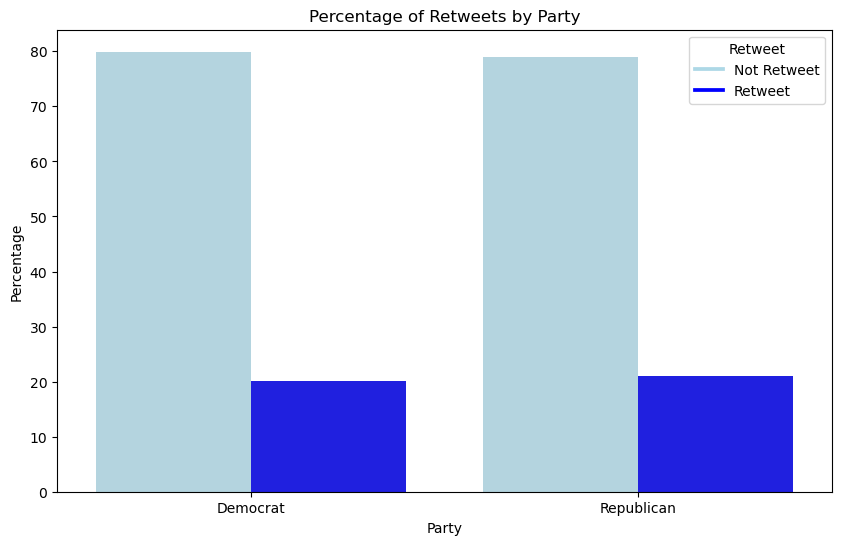

In [17]:
# Calculate the percentage of retweets for each party
retweet_percentage = df_cleaned.groupby('Party')['Retweet'].value_counts(normalize=True) * 100
retweet_percentage = retweet_percentage.rename('Percentage').reset_index()

# Set custom colors for the plot
colors = ['lightblue', 'blue']

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=retweet_percentage['Party'], y=retweet_percentage['Percentage'], hue=retweet_percentage['Retweet'], palette=colors)
plt.title('Percentage of Retweets by Party')
plt.xlabel('Party')
plt.ylabel('Percentage')

# Customize legend
legend_labels = ['Not Retweet', 'Retweet']
legend = plt.legend(title='Retweet', loc='upper right', labels=legend_labels)
legend.legendHandles[0].set_color(colors[0])
legend.legendHandles[1].set_color(colors[1])

### Binarize Party

- **Democrat = 1**
- **Republican = 0**

In [18]:
# Binarize the Party Column
df_cleaned['Is_Democrat'] = df_cleaned['Party'].apply(lambda x: 1 if 'Democrat' in x else 0)
print(df_cleaned.shape[0])
df_cleaned.head()

84549


,Party,Handle,Tweet,Retweet,Is_Democrat
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",0,1
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,1,1
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1,1
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,1,1
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1,1


Now we will extract all of the hashtags in the database

### Extract hashtags for each tweet

We will create a new columns holding the hashtags, if any, for each tweet.

Additionally, we will create a list of all hashtags for democrats and republicans

In [19]:
# Create a new column with the hashtags for each tweet
df_cleaned['Hashtags'] = None

#Iterate over each row in df['Tweets']
for index, row in df_cleaned.iterrows():
    # Use regex findall to search for all hashtags in each row
    hashtags = re.findall(r'#(\w+)', row['Tweet'])
    if hashtags:
        # Add the hashtags, if any, in the columns 'Hashtags' for each row
        df_cleaned.at[index, 'Hashtags'] = hashtags


In [20]:
# Check results
df_cleaned['Hashtags']

0        [SaveTheInternet, NetNeutrality]
1                                    None
2                                    None
3                      [NALCABPolicy2018]
4                                    None
                       ...               
86455                                None
86456                                None
86457                                None
86458                  [CobbBackToSchool]
86459                              [Zika]
Name: Hashtags, Length: 84549, dtype: object

In [21]:
# Create two empty lists to store hashtags
republican_hashtags = []
democrat_hashtags = []

# Loop through each row to add hashtags to list
for index, row in df_cleaned.iterrows():
    if row['Is_Democrat'] == 1 and row['Hashtags'] is not None:
        democrat_hashtags.extend(row['Hashtags'])
    elif row['Hashtags'] is not None:
        republican_hashtags.extend(row['Hashtags'])

##### Visualize the top 10 hashtags for Democrats and Republicans

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TaxReform'),
  Text(1, 0, 'TaxCutsandJobsAct'),
  Text(2, 0, 'taxreform'),
  Text(3, 0, 'SOTU'),
  Text(4, 0, 'TaxDay'),
  Text(5, 0, 'SmallBusinessWeek'),
  Text(6, 0, 'SchumerShutdown'),
  Text(7, 0, '2018FarmBill'),
  Text(8, 0, 'TaxCutsAndJobsAct'),
  Text(9, 0, 'FY19NDAA')])

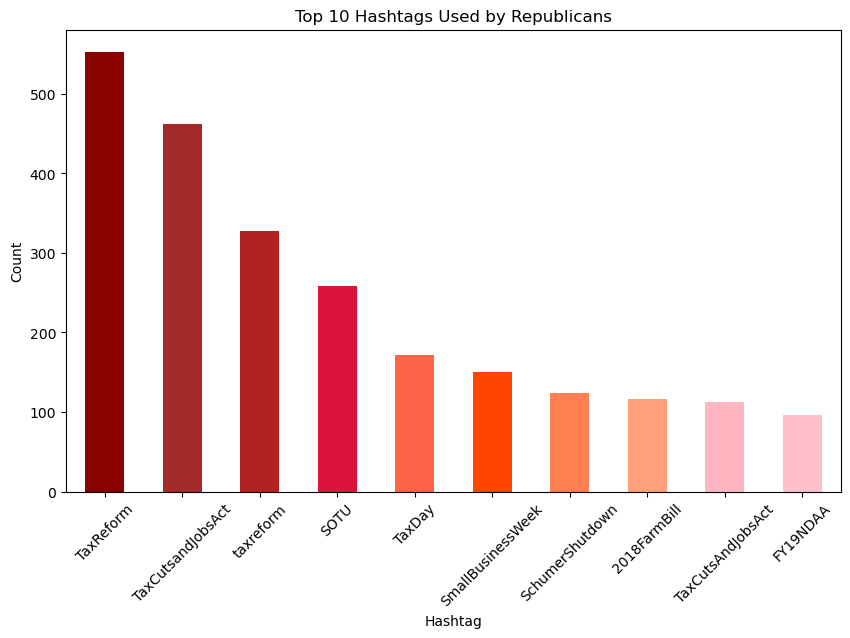

In [22]:
# Plot the 10 most used hasthags for Republicans

# Convert the list of Democrat hashtags to a Pandas Series and count occurrences
republican_10 = pd.Series(republican_hashtags).value_counts().head(10)
custom_red_colors = [
    '#8B0000',  # Dark red
    '#A52A2A',  # Brown
    '#B22222',  # Firebrick
    '#DC143C',  # Crimson
    '#FF6347',  # Tomato
    '#FF4500',  # Orange red
    '#FF7F50',  # Coral
    '#FFA07A',  # Light salmon
    '#FFB6C1',  # Light pink
    '#FFC0CB'   # Pink
]

# plot
republican_10.plot(kind='bar', figsize=(10,6), color=custom_red_colors)
plt.title('Top 10 Hashtags Used by Republicans')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GOPTaxScam'),
  Text(1, 0, 'NetNeutrality'),
  Text(2, 0, 'DACA'),
  Text(3, 0, 'Trump'),
  Text(4, 0, 'SNAP'),
  Text(5, 0, 'PuertoRico'),
  Text(6, 0, 'SOTU'),
  Text(7, 0, 'DREAMers'),
  Text(8, 0, 'IranDeal'),
  Text(9, 0, 'WomensHistoryMonth')])

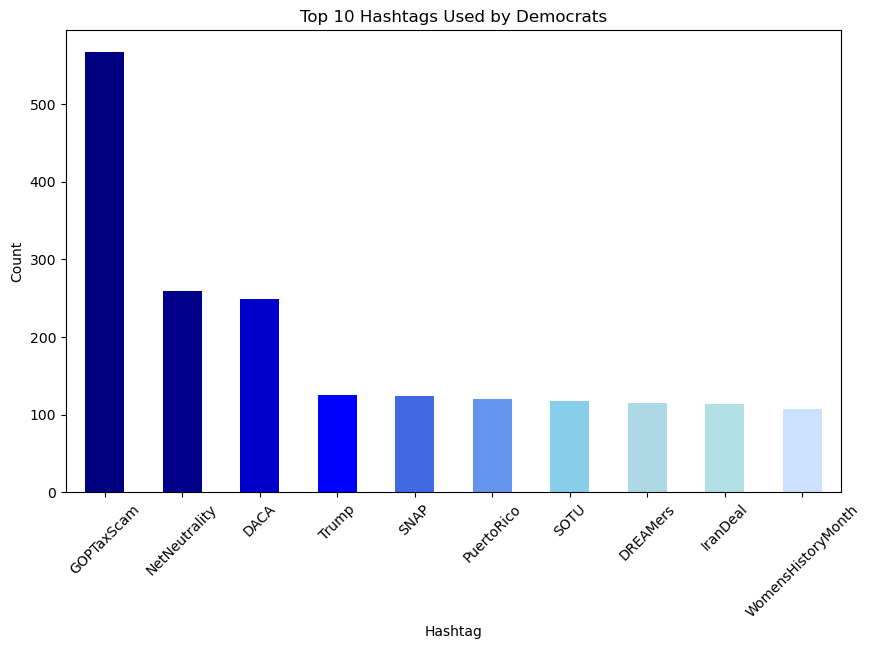

In [23]:
# Plot the 10 most used hasthags for Republicans

# Convert the list of Democrat hashtags to a Pandas Series and count occurrences
democrat_10 = pd.Series(democrat_hashtags).value_counts().head(10)
# Define custome colors to plot
custom_blue_colors = [
    '#000080',  # Navy
    '#00008B',  # Dark blue
    '#0000CD',  # Medium blue
    '#0000FF',  # Blue
    '#4169E1',  # Royal blue
    '#6495ED',  # Cornflower blue
    '#87CEEB',  # Sky blue
    '#ADD8E6',  # Light blue
    '#B0E0E6',  # Powder blue
    '#CAE1FF'   # Light steel blue
]
# Plot
democrat_10.plot(kind='bar', figsize=(10,6), color=custom_blue_colors)
plt.title('Top 10 Hashtags Used by Democrats')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation = 45)

## Word Cloud for Democrat and Republican Hashtags

A special mention to the article [WordClouds with Python](https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b), which provided guidance in creating the WordCloud.

To address the issue of repeated words in the WordCloud, I developed a function that calculates the frequency of words from both the Democrat and Republican hashtags lists. This approach was necessary to prevent the WordCloud from plotting duplicated words directly from the lists.


In [24]:
# Word Cloud
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


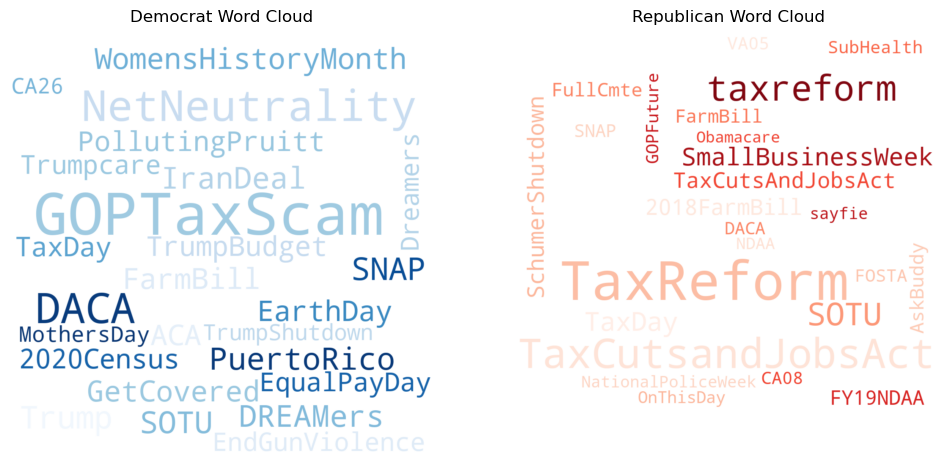

In [25]:
# Example data
democrat_text = " ".join(democrat_hashtags)
republican_text = " ".join(republican_hashtags)

# Function to get word frequencies
def get_word_frequencies(text):
    words = text.split()
    word_freq = {word: words.count(word) for word in set(words)}
    return word_freq

# Get word frequencies for Democrat and Republican hashtags
democrat_word_freq = get_word_frequencies(democrat_text)
republican_word_freq = get_word_frequencies(republican_text)

# Generate word clouds
democrat_wordcloud = WordCloud(width=1000, height=1000,
                               background_color='white',
                               max_words=25,
                               colormap='Blues',
                             # mask = democrat_mask,
                             # contour_width = 2, contour_color = 'black'
                              ).generate_from_frequencies(democrat_word_freq)

#democrat_wordcloud.generate(text)

republican_wordcloud = WordCloud(width=1000, height=1000,
                                 background_color='white',
                                 max_words=25,
                                 colormap="Reds",
                                # mask = republican_mask,
                                # contour_width = 2,contour_color = 'black'
                                ).generate_from_frequencies(republican_word_freq)

#republican_wordcloud.generate(text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(democrat_wordcloud, interpolation='bilinear')
plt.title('Democrat Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(republican_wordcloud, interpolation='bilinear')
plt.title('Republican Word Cloud')
plt.axis('off')

plt.show()

In [26]:
# Before preprocessing, we want to make sure the distribution of Democratic and Republican is balanced

# Count the occurrences of each party in the 'Party' column
parties_counts = df_cleaned['Party'].value_counts()

# Calculate the total number of occurrences
normalized_counts = parties_counts.sum()

# Dictionary to store the percentage of tweets for each party
tweets_percentage = {}

# Calculate the percentage of tweets for each party and store in the dictionary
for party, count in parties_counts.items():
    tweets_percentage[party] = f"{count/normalized_counts*100:.2f}%"

# Display the dictionary containing the percentage of tweets for each party
tweets_percentage


{'Republican': '51.37%', 'Democrat': '48.63%'}

The distribution is fair enough, it is almost 50/50, se we can continue processing the data

## Data Cleaning

In [27]:
# Import Necessary Libraries and Modules
import string

# SK Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer

# NLTK
import nltk

# Downloads
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')

# Other nltk modules
from nltk.corpus import stopwords
import nltk as nlp
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Defining Stopwords

In [28]:
# define stopwords
stopwords = stopwords.words('english')

# add some unnecessary word to stopwords list
# some are abbreviation used by people to save caracters
stopwords.append("rt") # retweets
stopwords.append("u") # you
stopwords.append("r") # are
stopwords.append("amp") # ampersand
stopwords.append("w") # with
stopwords.append("th") #hat tip
stopwords.append("s")

# print the length of the stopwords
len(stopwords)

186

#### Cleaning Tweets

In [29]:
# # Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a function to clean the tweets
def clean_tweets(tweet):

    # Remove @ sign and all handles
    tweet = re.sub("@[A-Za-z0-9]+", "", tweet)

    # Remove hashtags and words that come together with hashtags
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove all punctuation. It also removes hashtags.
    tweet = re.sub("[!@$%^&*()_+\|/?,.:;'`’]+", "", tweet)

    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)

    # lowercase all characters
    tweet = tweet.lower()

    # Remove extra whitespace
    tweet = " ".join(tweet.split())

    # Remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in stopwords])

    # Lemmatization
    tokens = nltk.word_tokenize(tweet)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tweet = " ".join(lemmatized_tokens)

    # Remove three dots from the final word, preserving the word itself
    tweet = re.sub(r'(\S+)\.{2,}$', r'\1', tweet)

    # Remove dots from the end of the final word, even if there are fewer than three
    tweet = re.sub(r'\.+$', '', tweet)

    # Remove the last word '...'
    tweet = tweet.rsplit(' ', 1)[0]

    return tweet

# Create a new column with the cleaned text for every tweet
df_cleaned['Clean_Tweet'] = df_cleaned['Tweet'].map(clean_tweets)

In [30]:
# Proof check results
print(df_cleaned['Clean_Tweet'][200])
print(df_cleaned['Tweet'][200])

congrats month cristina rocha rodriguez currently student
Congrats to this month’s #NevadaWomanInSTEM, Cristina Rocha Rodriguez! She is currently a student at @CSNCoyote &amp; a… https://t.co/r6GCiar0iM


## Preprocesing

In [31]:
# CountVectorizer
vectorizer = CountVectorizer(
    max_df = 0.95,
    min_df = 10,
    #ngram_range = 1 #Ngrams might slow down vectorization a lot
)

Splitting the data into training and testing sets

In [32]:
# Tokenize the 'Tweet' column
# PD Conancat between the vectorizer text and the remaning columns

#run the fit transform first and then do the toarray() to get it back intoa numpy format and the pd concat it into the other column I want to do.

X = df_cleaned.drop(columns = ['Tweet', 'Party', 'Handle', 'Is_Democrat'])

# Define target variable
y = df_cleaned['Is_Democrat']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [33]:
X_train.shape[0]

59184

In [34]:
unique_words_list = set(" ".join(list(X_train["Clean_Tweet"])).split())

In [35]:
len(unique_words_list)

30451

##### Transforming the Cleaned Tweets Column

In [36]:
# fitting the CountVectorizer to the cleaned tweets
vectorizer.fit(X_train['Clean_Tweet'])

# Transforming the Positive_Review column in the training data into a dense array.
# This is necessary for compatibility with the subsequent DataFrame creation.
Tweet_X_train = vectorizer.transform(X_train['Clean_Tweet']).toarray()

# transforming the Positive_Review column in the testing data.
Tweet_X_test = vectorizer.transform(X_test['Clean_Tweet']).toarray()

# Transforming the training data into a DataFrame with feature names as columns, prefixed with "pos_".
Tweet_X_train = pd.DataFrame(Tweet_X_train,columns=vectorizer.get_feature_names_out(),index=X_train.index).add_prefix("Tweet_")

# Transforming the testing data into a DataFrame with feature names as columns, prefixed with "pos_".
Tweet_X_test = pd.DataFrame(Tweet_X_test,columns=vectorizer.get_feature_names_out(),index=X_test.index).add_prefix("Tweet_")

##### Trasforming the Hshtags Columns

In [37]:
# Replace None values with empty strings
X_train['Hashtags'] = X_train['Hashtags'].apply(lambda x: '' if x is None else x)
X_test['Hashtags'] = X_test['Hashtags'].apply(lambda x: '' if x is None else x)

# Convert lists to strings
X_train['Hashtags'] = X_train['Hashtags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X_test['Hashtags'] = X_test['Hashtags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# fitting the CountVectorizer to the hashtags
# might have to separate the list of hashtags into words with spaces
vectorizer.fit(X_train['Hashtags'])

# Transforming the 'Hashtags' column for training data
Hashtags_X_train = vectorizer.transform(X_train['Hashtags']).toarray()

# Transforming the 'Hashtags' column for testing data
Hashtags_X_test = vectorizer.transform(X_test['Hashtags']).toarray()

# Transforming the training data into a DataFrame with feature names as columns, prefixed with "Hashtags_"
Hashtags_X_train = pd.DataFrame(Hashtags_X_train, columns=vectorizer.get_feature_names_out(), index=X_train.index).add_prefix("Hashtags_")

# Transforming the testing data into a DataFrame with feature names as columns, prefixed with "Hashtags_"
Hashtags_X_test = pd.DataFrame(Hashtags_X_test, columns=vectorizer.get_feature_names_out(), index=X_test.index).add_prefix("Hashtags_")

# Visualize features for reference
vectorizer.get_feature_names_out()

array(['2018farmbill', '2020census', '2a', '31reasons4taxreform',
       '4yearstoolong', '6monthsaftermaria', 'aapi', 'abetterdeal',
       'able', 'aca', 'actonclimate', 'affordablehousing', 'ag',
       'agriculture', 'ahca', 'al03', 'al06', 'alabama', 'alpolitics',
       'america', 'ar3', 'ar4', 'armeniangenocide', 'arnews', 'arpx',
       'askbuddy', 'askjulia', 'autism', 'az01', 'bbog', 'betterway',
       'bhm', 'bigguns', 'billionairesfirst', 'bipartisan',
       'blackhistorymonth', 'bokoharam', 'bootpruitt', 'bordersecurity',
       'bostonmarathon', 'breaking', 'bringbackourgirls', 'broadband',
       'bronx', 'budget', 'ca', 'ca08', 'ca17', 'ca26', 'ca33', 'ca44',
       'california', 'cbcdemandsjustice', 'cbctech2020', 'cfpb',
       'charlottesville', 'checkyourcheck', 'chibokgirls', 'chicago',
       'chip', 'cincodemayo', 'civilrights', 'cleanpowerplan',
       'climatechange', 'co06', 'congress', 'congressionalartcompetition',
       'cte', 'cultureofcorruption', 'cyb

In [38]:
# Combining the sparse matrix of positive reviews with the numerical data in the training set.
# This concatenation ensures that the transformed text features are included alongside the original numerical features.
X_train_final = pd.concat([Tweet_X_train, Hashtags_X_train, X_train.drop(['Clean_Tweet', 'Hashtags'], axis=1)],axis=1)

# Combining the sparse matrix of negative reviews with the numerical data
X_test_final = pd.concat([Tweet_X_test, Hashtags_X_test, X_test.drop(['Clean_Tweet', 'Hashtags'], axis=1)],axis=1)

In [39]:
# Revise symmetry in the shape of the train and test sets
# Shape of the train and test sets
print(f'The shape of the X_train_final set is: {X_train_final.shape}')
print(f'The shape of the X_test_final set is: {X_test_final.shape}')
print(f'The shape of the y_train set is: {y_train.shape}')
print(f'The shape of the y_test set is: {y_test.shape}')

The shape of the X_train_final set is: (59184, 5621)
The shape of the X_test_final set is: (25365, 5621)
The shape of the y_train set is: (59184,)
The shape of the y_test set is: (25365,)


## Modelling

We will train a logistic regression model on the dataset and assess its accuracy on both the training and testing sets. Subsequently, we will compare these results with those obtained from the RandomForestClassifier in the pipeline. The model exhibiting the highest accuracy will undergo a more detailed evaluation through the construction and analysis of a confusion matrix.

### Scale the Data
Scale the data before modelling

In [40]:
from sklearn.preprocessing import StandardScaler

# Instantiatie
scaler = StandardScaler()

# fit
scaler.fit(X_train_final)

# Transform
X_train_scaled = scaler.transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(C=0.1, tol=0.1, n_jobs=-1, solver='sag')

# Fit the model on training data
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, n_jobs=-1, solver='sag', tol=0.1)

In [42]:
# Predictions on training and testing data
train_preds = logistic_model.predict(X_train_scaled)
test_preds = logistic_model.predict(X_test_scaled)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 78.44%
Testing Accuracy: 72.99%


Since the model is slightly overfitted, my intention was to conduct cross-validation for the Logistic Regression using a pipeline. Unfortunately, running this code was not feasible, even in Google Colab, due to insufficient memory allocation, despite attempting some dimensionality reduction.

I plan to ensure the success of this process for the next deliverable. However, I faced limitations when testing it, as my own computer has serious constraints when running models of a certain size.

In [43]:
# from sklearn.decomposition import NMF
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import MinMaxScaler

# estimators = [('scale', StandardScaler()),
#               ('feature_selection', SelectKBest(f_classif)),  # Add SelectKBest before NMF
#               ('dim_red', NMF()),
#               ('model', LogisticRegression(solver='liblinear'))]

# pipe = Pipeline(estimators)

# param_grid = [{'scale': [StandardScaler(), MinMaxScaler()],
#                'feature_selection__k': [20, 50, 100],  # Adjust k for feature selection
#                'dim_red__n_components': [5, 10, 20, 50, 10],  # Explore smaller component numbers
#                'model__C': np.logspace(-3,3,11),  # Reduce C values for less memory
#                'model__penalty': ["l1","l2"],}]

# grid = GridSearchCV(pipe,
#                     param_grid,
#                     cv=5,
#                     verbose=2,
#                     n_jobs=1,  # Set to 1 for conservative memory usage
#                     scoring="f1_macro")

# fittedgrid = grid.fit(X_train_final, y_train)

In [ ]:
# # Print the best parameters and corresponding accuracy
# print("Best Parameters:", grid.best_params_)
# print(f"Best Accuracy: {grid.best_score_*100:.2f}%")

### Top Words and Hashtags for Republican and Democrat Tweets

By analyzing the highest model coefficients, we gain valuable insights into the words that significantly contribute to the model's ability to predict democrat or republican tweets. The bar plots offer a clear visualization of the importance of each word in influencing sentiment predictions.

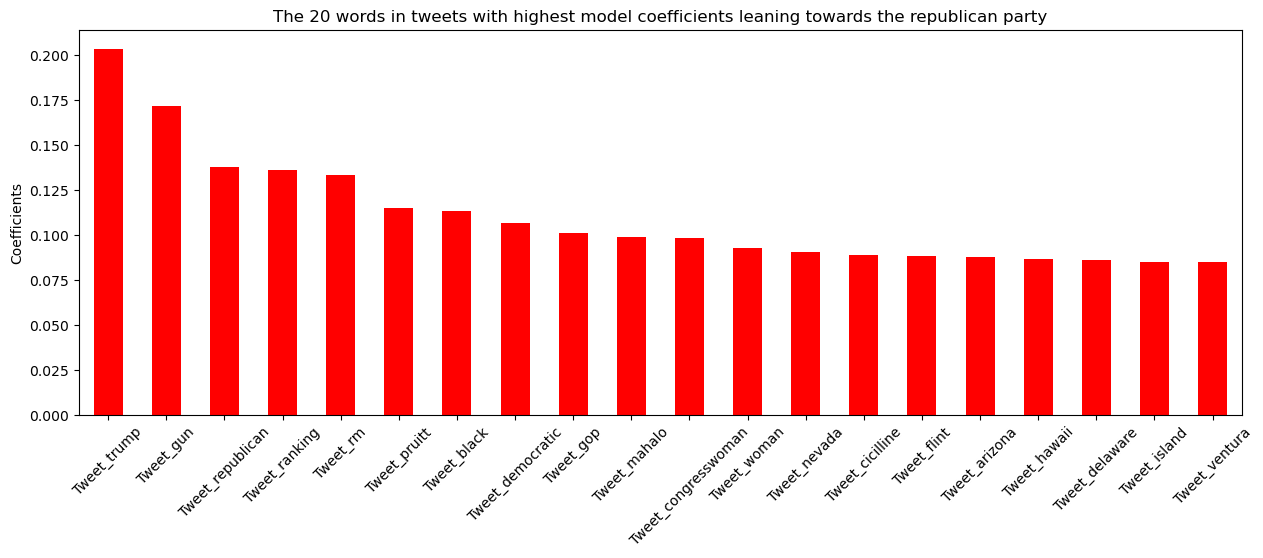

In [44]:
# Extracting the top 20 words from tweets to predict if a tweet has republican inclinations.
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)

# Plot the top 20 words for republican tweets
word_counts.loc[word_counts.index.str.startswith('Tweet_'),:].head(20).plot(kind="bar", figsize=(15, 5), legend=False, color='red')
plt.title("The 20 words in tweets with highest model coefficients leaning towards the republican party")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

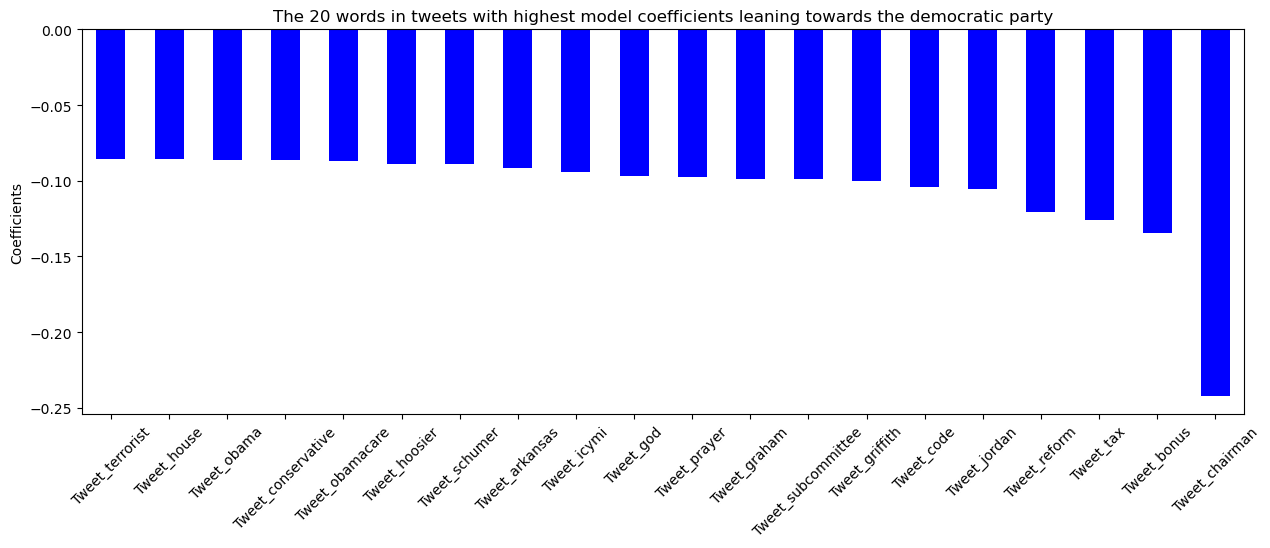

In [45]:
# Extracting the top 20 words to predict democrat tweets
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)

# Plot the top 20 words for democrat tweets
word_counts.loc[word_counts.index.str.startswith('Tweet_'),:].tail(20).plot(kind="bar", figsize=(15, 5), legend=False, color='blue')
plt.title("The 20 words in tweets with highest model coefficients leaning towards the democratic party")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

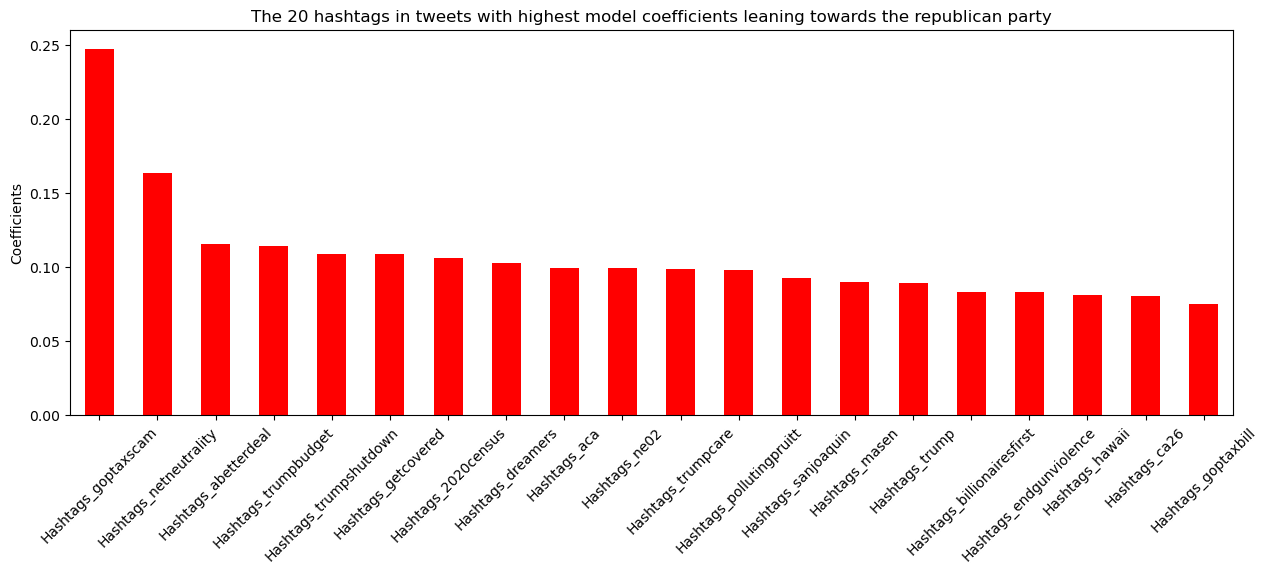

In [46]:
# Extracting the top 20 hashtags to predict republican tweets
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)


# Plot the top 20 hashtags for republican tweets
word_counts.loc[word_counts.index.str.startswith('Hashtags_'),:].head(20).plot(kind="bar", figsize=(15, 5), legend=False, color='red')
plt.title("The 20 hashtags in tweets with highest model coefficients leaning towards the republican party")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

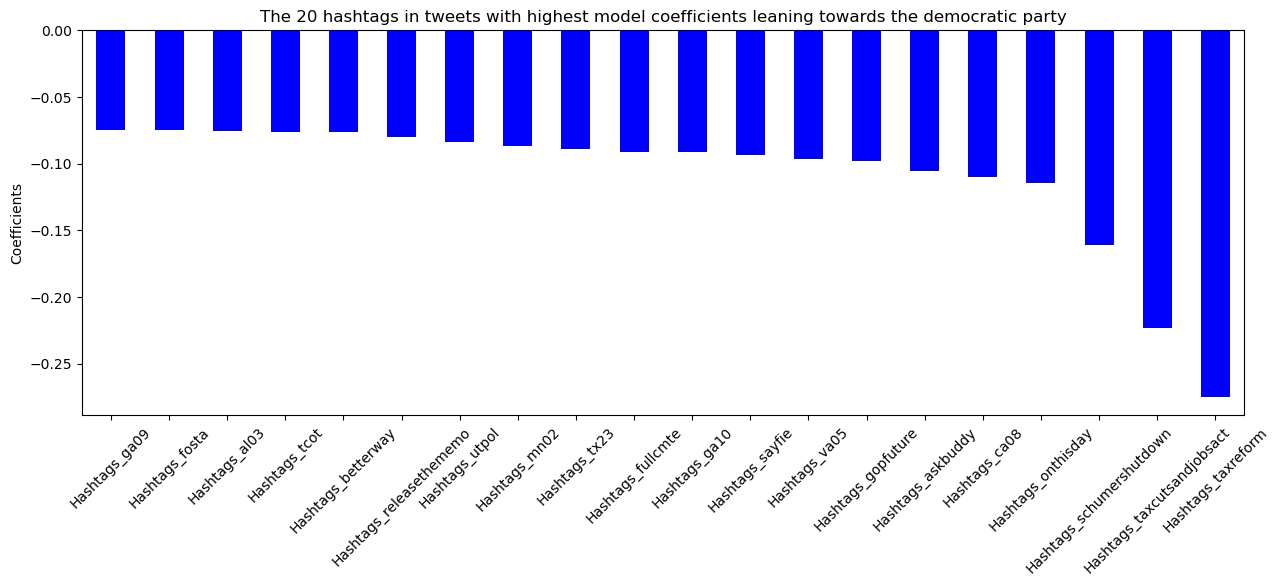

In [48]:
# Extracting the top 20 hashtags to predict democrat tweets
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)


# Plot the top 20 hashtags for democrat tweets
word_counts.loc[word_counts.index.str.startswith('Hashtags_'),:].tail(20).plot(kind="bar", figsize=(15, 5), legend=False, color='blue')
plt.title("The 20 hashtags in tweets with highest model coefficients leaning towards the democratic party")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

### Building a Pipeline

Employing a pipeline, the data will undergo scaling and, in conjunction with Principal Component Analysis (PCA), a decision tree classifier will be constructed.

In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define the pipeline with RandomForestClassifier
estimators_rf = [('scale', StandardScaler()),
                 ('dim_red', NMF()),
                 ('feature_selection', SelectKBest(f_classif)),
                 ('model', RandomForestClassifier())]

pipe_rf = Pipeline(estimators_rf)

# Define the parameter grid for Random Forest
param_grid_rf = [
    {
        'scale': [StandardScaler(), MinMaxScaler()],
        'dim_red__n_components': [5, 10, 20],
        'feature_selection__k': [20, 50],
        'model__n_estimators': [50, 100, 200],  # Number of trees
        'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    }
]

# Create the GridSearchCV object for Random Forest
grid_rf = GridSearchCV(pipe_rf,
                       param_grid_rf,
                       cv=5,
                       verbose=2,
                       n_jobs=2,
                       scoring="f1_macro")

In [54]:
# Fit the Random Forest model
fittedgrid_rf = grid_rf.fit(X_train_final[::100], y_train[::100])

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
660 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, 

In [55]:
# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_rf.best_params_)
print(f"Best Accuracy: {grid_rf.best_score_*100:.2f}%")

Best Parameters: {'dim_red__n_components': 20, 'feature_selection__k': 20, 'model__max_depth': None, 'model__n_estimators': 50, 'scale': MinMaxScaler()}
Best Accuracy: 56.83%


### Confusion Matrix

Examining the confusion matrix for the Logistic Regression model, which yielded a superior accuracy score.

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the following prediction already calculated above: test_preds = logistic_model.predict(X_test_scaled)

# Generate confusion matrix
reviews_matrix = confusion_matrix(y_test, test_preds)

# Label rows and columns
reviews_df = pd.DataFrame(
    reviews_matrix,
    columns=["Predicted Democrat", "Predicted Republican"],
    index=["True Democrat", "True Republican"]
)

display(reviews_df)

,Predicted Democrat,Predicted Republican
True Democrat,9909,3122
True Republican,3730,8604


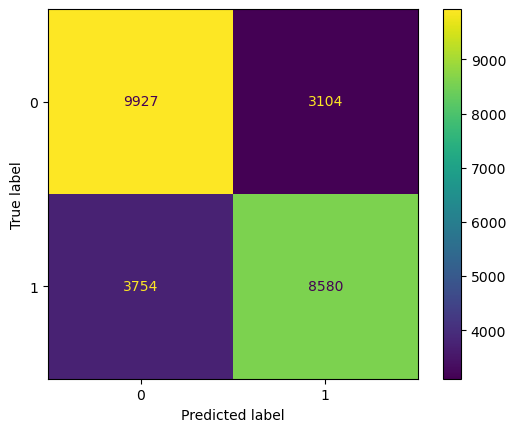

In [58]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_scaled, y_test);

In [59]:
# select the FP from the confusion matrix
# true label 0 & predicted label 1
fp = reviews_matrix[0, 1]

print(f"{fp} democrats were misclassified as republicans.")

3122 democrats were misclassified as republicans.


In [61]:
# select the TP from the confusion matrix
# true label 1 & predicted label 1
tp = reviews_matrix[1, 1]

# total number of true label 1
bad_reviews = reviews_matrix[1, :].sum()

print(f"{tp} republicans were predicted correctly by the model out of {bad_reviews} republicans.")

8604 republicans were predicted correctly by the model out of 12334 republicans.


### Precission and Recall

In [62]:
# Precision 
from sklearn.metrics import precision_score

print(f"The precission score is: {precision_score(y_test, test_preds) * 100:.2f}%")

The precission score is: 73.38%


In [63]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
print(f"The recall score is: {recall_score(y_test, test_preds) *100:.2f}%")

The recall score is: 69.76%


In [64]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, test_preds)
print(report_initial)

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     13031
           1       0.73      0.70      0.72     12334

    accuracy                           0.73     25365
   macro avg       0.73      0.73      0.73     25365
weighted avg       0.73      0.73      0.73     25365



## Conclusion

In concluding this phase of our project, our Logistic Regression model yielded notable insights into the classification of political tweets. The model exhibited a training accuracy of 78.44% and a testing accuracy of 72.99%. While these results provide a foundation, there is a recognition of the need for further refinement and validation.

Our analysis extends beyond accuracy metrics; the identification of top words and hashtags with the highest model coefficients unveils key features driving the model's predictions. This valuable information not only enhances our understanding of the current dataset but also lays the groundwork for predicting future tweets' political affiliations. The ability to discern the significance of specific words and hashtags in classifying tweets as Democrat or Republican is a powerful tool for interpreting and predicting online political discourse.

## Next Steps

Moving forward, our agenda encompasses several critical steps to refine and expand our analysis:

1. Cross-Validation for Logistic Regression: A crucial step to address the observed overfitting and further validate the model's performance.

2. Pipeline Implementation for Naive Bayes: We plan to extend our analysis by applying a Naive Bayes model through a pipeline, exploring its potential in classifying political tweets.

3. Memory Allocation Optimization: Resolving memory allocation issues is a priority, ensuring our models run seamlessly and efficiently on diverse platforms.

4. Sentiment Analysis Implementation: Introducing sentiment analysis specific to Democrat and Republican tweets will provide nuanced insights into the emotional tone of political discussions.

5. Identification of Top Words for Each Sentiment: Extending our analysis to discern the most significant words influencing sentiment in both Democrat and Republican tweets.

6. Scraping Additional Dataset: Augmenting our dataset through scraping will enhance the diversity and richness of our data, contributing to a more comprehensive understanding of political discourse.

7. Neural Network Application: Exploring the application of neural networks to gain deeper insights and potentially improve the predictive capabilities of our models.

8. Further Exploratory Data Analysis (EDA): Continuous exploration of the dataset will uncover additional patterns, trends, and relationships, enhancing the depth of our understanding.

As we embark on these next steps, the project's evolution promises to bring a more robust and detailed understanding of political tweets, contributing to the broader discourse surrounding digital political communication.
